In [41]:
import cv2
print(cv2.__version__)

4.2.0


In [42]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(657, 997, 3)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 254 ... 254 255 255]
 ...
 [255 255 254 ... 254 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


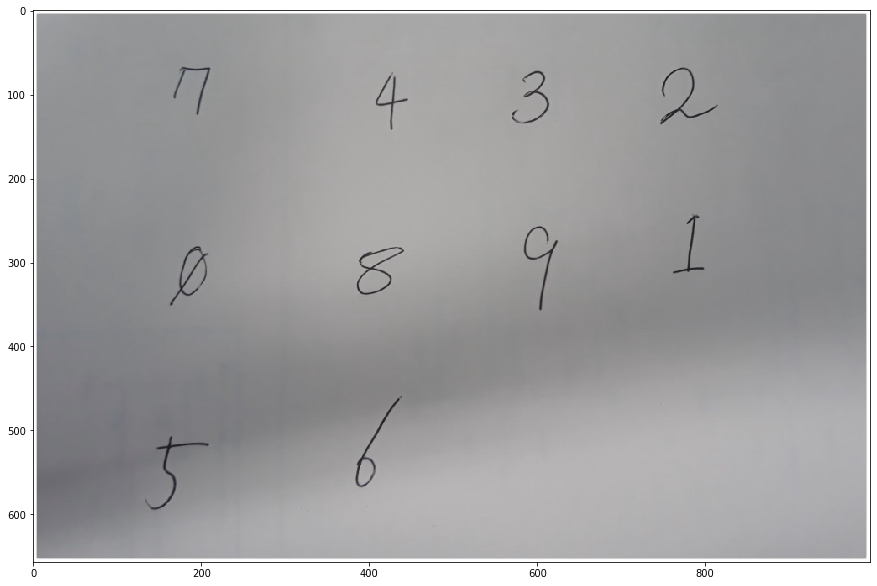

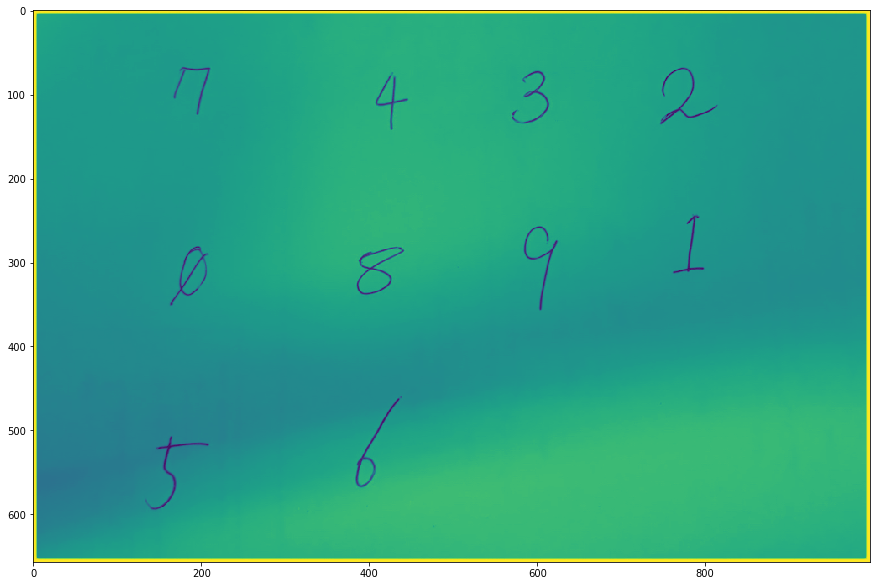

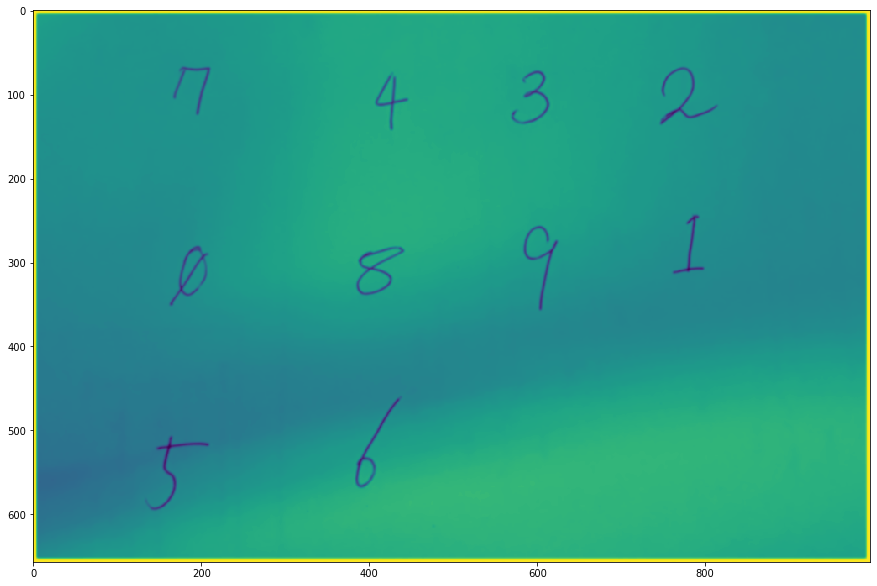

In [43]:
img = cv2.imread("./nums/nums2.jpg")

plt.figure(figsize=(15,12))
plt.imshow(img)

print(img.shape)

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(15,12))
plt.imshow(img_gray)

img_blur = cv2.GaussianBlur(img_gray, (5, 5), 0)
plt.figure(figsize=(15,12))
plt.imshow(img_blur)

print(img_blur)

# 적당한 threshold 값을 찾아서
ret, img_th = cv2.threshold(img_blur, 100, 230, cv2.THRESH_BINARY_INV)
#image, contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours, hierachy = cv2.findContours(img_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

rects = [cv2.boundingRect(each) for each in contours]
#rects

In [44]:
tmp = [w*h for (x,y,w,h) in rects]
tmp.sort()
tmp

[1,
 4,
 6,
 6,
 11,
 12,
 12,
 20,
 28,
 60,
 209,
 840,
 1116,
 1131,
 1216,
 1769,
 1804,
 2408,
 2484,
 3080,
 4356,
 5460,
 6160]

In [45]:
# 제일 큰 아이 두개를 빼고, 나머지의 넓이를 찾을 수 있습니다. 그래서 넓이값으로 다시 한 번 더 걸러주는거죠...
#rects = [(x,y,w,h) for (x,y,w,h) in rects if ((w*h>15000)and(w*h<500000))]
rects = [(x,y,w,h) for (x,y,w,h) in rects]
rects

[(402, 556, 2, 2),
 (140, 507, 70, 88),
 (385, 462, 52, 105),
 (386, 317, 40, 21),
 (201, 313, 5, 12),
 (389, 289, 38, 32),
 (415, 285, 6, 2),
 (423, 284, 1, 1),
 (437, 283, 4, 5),
 (163, 281, 44, 70),
 (602, 275, 22, 82),
 (585, 258, 29, 39),
 (763, 244, 36, 69),
 (571, 127, 2, 3),
 (426, 127, 2, 14),
 (571, 121, 3, 4),
 (409, 94, 36, 31),
 (412, 84, 11, 19),
 (430, 82, 1, 11),
 (423, 80, 2, 3),
 (586, 73, 29, 61),
 (748, 69, 66, 66),
 (168, 68, 43, 56)]

[(402, 556, 2, 2), (140, 507, 70, 88), (385, 462, 52, 105), (386, 317, 40, 21), (201, 313, 5, 12), (389, 289, 38, 32), (415, 285, 6, 2), (423, 284, 1, 1), (437, 283, 4, 5), (163, 281, 44, 70), (602, 275, 22, 82), (585, 258, 29, 39), (763, 244, 36, 69), (571, 127, 2, 3), (426, 127, 2, 14), (571, 121, 3, 4), (409, 94, 36, 31), (412, 84, 11, 19), (430, 82, 1, 11), (423, 80, 2, 3), (586, 73, 29, 61), (748, 69, 66, 66), (168, 68, 43, 56)]
(402, 556, 2, 2)
0: 402 556
(140, 507, 70, 88)
0: 140 507
(385, 462, 52, 105)
0: 385 462
(386, 317, 40, 21)
0: 386 317
(201, 313, 5, 12)
0: 201 313
(389, 289, 38, 32)
0: 389 289
(415, 285, 6, 2)
0: 415 285
(423, 284, 1, 1)
0: 423 284
(437, 283, 4, 5)
0: 437 283
(163, 281, 44, 70)
0: 163 281
(602, 275, 22, 82)
0: 602 275
(585, 258, 29, 39)
0: 585 258
(763, 244, 36, 69)
0: 763 244
(571, 127, 2, 3)
0: 571 127
(426, 127, 2, 14)
0: 426 127
(571, 121, 3, 4)
0: 571 121
(409, 94, 36, 31)
0: 409 94
(412, 84, 11, 19)
0: 412 84
(430, 82, 1, 11)
0: 430 82
(423, 80, 2,

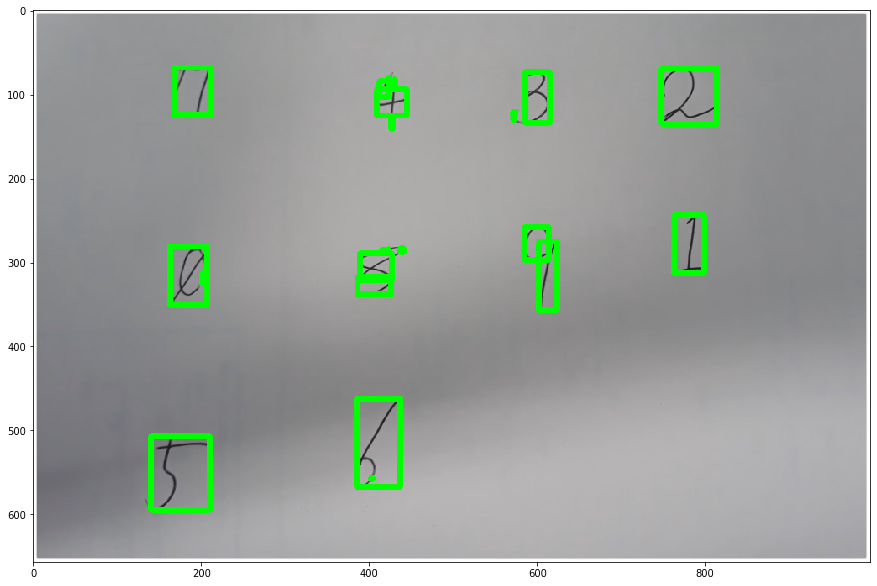

In [46]:
img_result = []
img_for_class = img.copy()

margin_pixel = 60
print(rects)
for rect in rects:
    #[y:y+h, x:x+w]
    img_result.append(
        img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel, 
                      rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel])
    
    # Draw the rectangles
    print(rect)
    print("0:", rect[0], rect[1])
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5)

plt.figure(figsize=(15,12))
plt.imshow(img)

ValueError: num must be 1 <= num <= 12, not 13

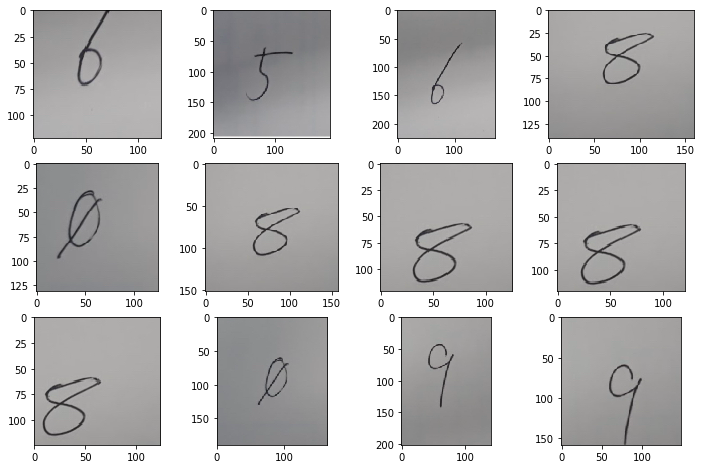

In [47]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(n, cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [ ]:
count = 0
nrows = 3
ncols = 4

plt.figure(figsize=(12,8))

for n in img_result:
    count += 1
    plt.subplot(nrows, ncols, count)
    plt.imshow(cv2.resize(n,(28,28)), cmap='Greys', interpolation='nearest')

plt.tight_layout()
plt.show()

In [ ]:
# 모델 불러오기
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
import tensorflow as tf
import keras
from keras.models import load_model
model = load_model('mnist_mlp_model.h5')

model.summary()

In [ ]:
img_result = []
img_for_class = img.copy()

margin_pixel = 60

for rect in rects:
    #[y:y+h, x:x+w]
    target_num = img_for_class[rect[1]-margin_pixel : rect[1]+rect[3]+margin_pixel,
                               rect[0]-margin_pixel : rect[0]+rect[2]+margin_pixel]
    test_num = cv2.resize(target_num, (28,28))[:,:,1]
    test_num = (test_num < 70) * test_num
    test_num = test_num.astype('float32') / 255.
    test_num = test_num.reshape((1, 28, 28, 1))
    predicted_num = model.predict_classes(test_num)
    
    # Draw the rectangles
    cv2.rectangle(img, (rect[0], rect[1]), 
                  (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 5) 
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(img, str(predicted_num[0]), (rect[0],rect[1]), font, 4, (0,0,255), 10)

plt.figure(figsize=(15,12))
plt.imshow(img)